In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [3]:

columns = [
    "age", "workclass", "fnlwgt", "education", "educational-num",
    "marital-status", "occupation", "relationship", "race", "gender",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Load training data
train = pd.read_csv(r"C:\Users\Mayank\Downloads\adult\adult.data", names=columns,
                    na_values='?', skipinitialspace=True)

# Load test data (remove the first row with "|1x3 Cross validator")
test = pd.read_csv(r"C:\Users\Mayank\Downloads\adult\adult.test", names=columns,
                   na_values='?', skipinitialspace=True, skiprows=1)

# Combine training and test datasets
df = pd.concat([train, test], ignore_index=True)




In [22]:
df['income'] = df['income'].astype(str)


In [23]:
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)


In [24]:
df.shape

(45194, 15)

In [25]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [26]:
print("\nMissing values per column:\n", df.isnull().sum())



Missing values per column:
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [27]:
df.dropna(inplace=True)  

In [28]:
df.drop_duplicates(inplace=True)

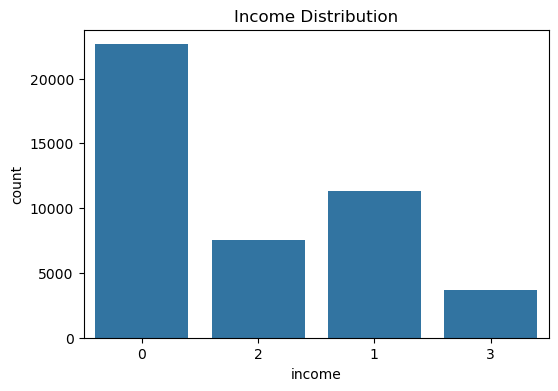

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='income', data=df)
plt.title("Income Distribution")
plt.show()

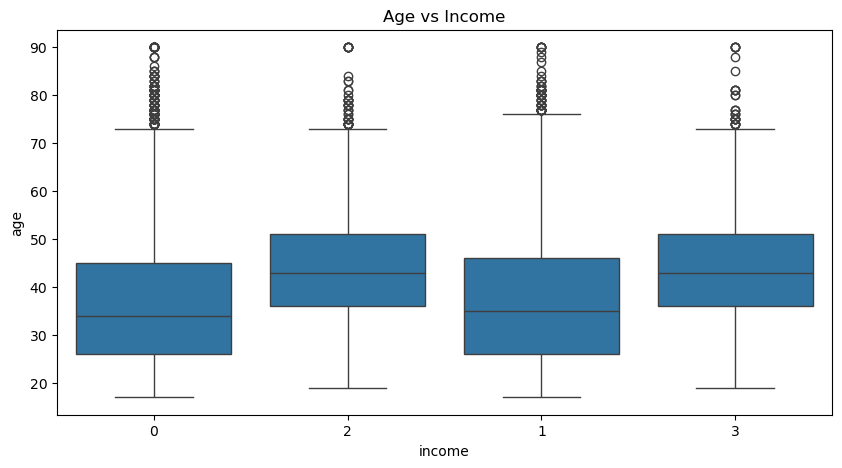

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='income', y='age', data=df)
plt.title("Age vs Income")
plt.show()


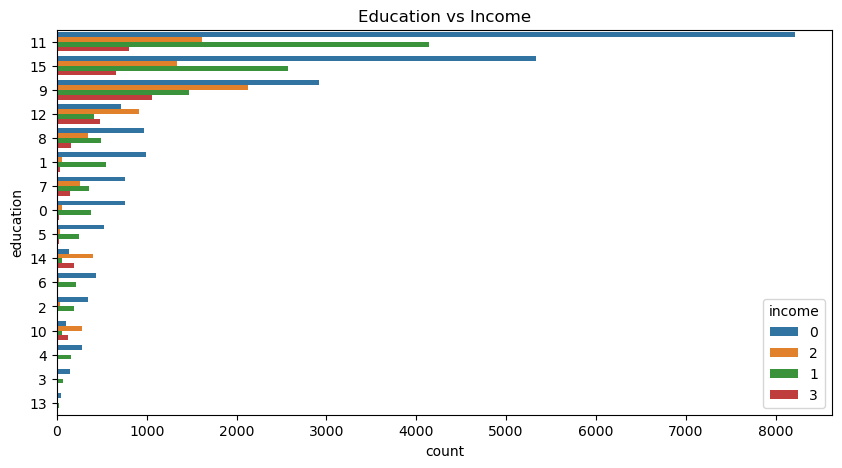

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(y='education', hue='income', data=df, order=df['education'].value_counts().index)
plt.title("Education vs Income")
plt.show()

In [32]:
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [33]:
X = df.drop('income', axis=1)
y = df['income']

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [36]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [37]:
# XGBoost
xg_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xg_clf.fit(X_train, y_train)
y_pred_xgb = xg_clf.predict(X_test)

D:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Logistic Regression ---
Accuracy: 0.5476269498838368
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.94      0.70      4527
           1       0.00      0.00      0.00      2271
           2       0.48      0.47      0.47      1501
           3       0.00      0.00      0.00       740

    accuracy                           0.55      9039
   macro avg       0.26      0.35      0.29      9039
weighted avg       0.36      0.55      0.43      9039



D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


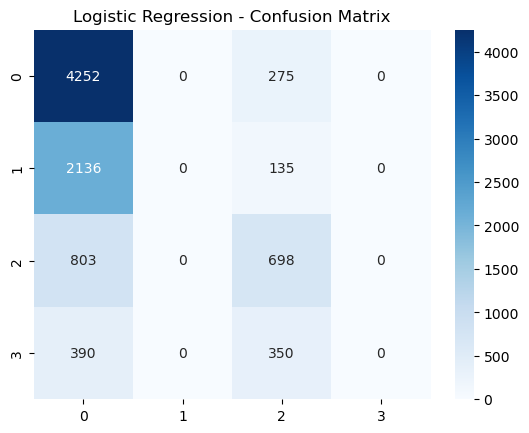


--- Random Forest ---
Accuracy: 0.5339086182099789
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.81      0.69      4527
           1       0.29      0.12      0.17      2271
           2       0.51      0.55      0.53      1501
           3       0.17      0.06      0.09       740

    accuracy                           0.53      9039
   macro avg       0.39      0.39      0.37      9039
weighted avg       0.47      0.53      0.48      9039



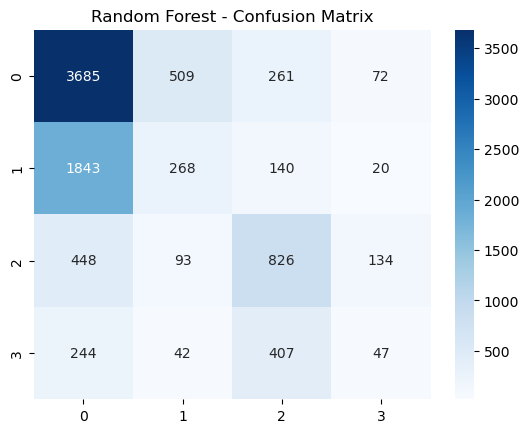


--- XGBoost ---
Accuracy: 0.5692001327580485
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.91      0.72      4527
           1       0.34      0.03      0.06      2271
           2       0.51      0.61      0.56      1501
           3       0.26      0.04      0.08       740

    accuracy                           0.57      9039
   macro avg       0.43      0.40      0.35      9039
weighted avg       0.49      0.57      0.47      9039



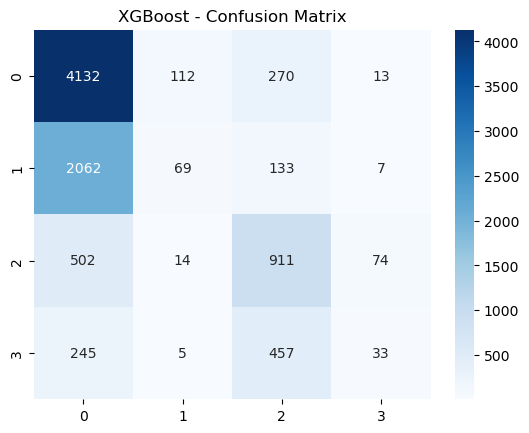

In [38]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

In [40]:

sample = np.array([[37, 4, 284582, 9, 10, 1, 2, 0, 4, 1, 0, 0, 40, 39]]) 
sample_scaled = scaler.transform(sample)
predicted_income = xg_clf.predict(sample_scaled)
print("\nPredicted Income Class (0 = <=50K, 1 = >50K):", predicted_income)



Predicted Income Class (0 = <=50K, 1 = >50K): [0]


D:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
